

*  Qingqing Song, Tianchu Xie

Grover’s Algorithm for Graph Coloring Challenge



In [9]:
# Imports!
!pip install qiskit
import numpy as np
from qiskit import QuantumCircuit, execute, transpile, Aer, IBMQ
from qiskit.visualization import *
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram

print("Libraries imported successfully!")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Libraries imported successfully!


In [10]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, IBMQ, execute


In [11]:
# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram

In [38]:
# clause_list = [[0,1],
#                [0,2],
#                [1,3],
#                [2,3]]
# num_city = 4

clause_list = [[0,1],
               [0,3],
               [1,2],
               [1,4],
               [2,5],
               [3,4],
               [4,5]]
num_city = 6

In [39]:
def XOR(qc, a, b, output):
    qc.cx(a, output)
    qc.cx(b, output)

In [40]:
var_qubits = QuantumRegister(num_city, name='v')
clause_qubits = QuantumRegister(len(clause_list), name='c')
output_qubit = QuantumRegister(1, name='out')
cbits = ClassicalRegister(num_city, name='cbits')
qc = QuantumCircuit(var_qubits, clause_qubits, output_qubit, cbits)

def cityColor_oracle(qc, clause_list, clause_qubits):
    # Compute clauses
    i = 0
    for clause in clause_list:
        XOR(qc, clause[0], clause[1], clause_qubits[i])
        i += 1

    # Flip 'output' bit if all clauses are satisfied
    qc.mct(clause_qubits, output_qubit)

    # Uncompute clauses to reset clause-checking bits to 0
    i = 0
    for clause in clause_list:
        XOR(qc, clause[0], clause[1], clause_qubits[i])
        i += 1

cityColor_oracle(qc, clause_list, clause_qubits)
qc.draw()

»
    v_0: ──■─────────■─────────────────────────────────────────────────────────»
           │         │                                                         »
    v_1: ──┼────■────┼─────────■─────────■─────────────────────────────────────»
           │    │    │         │         │                                     »
    v_2: ──┼────┼────┼─────────┼────■────┼──────────────■──────────────────────»
           │    │    │         │    │    │              │                      »
    v_3: ──┼────┼────┼────■────┼────┼────┼────■─────────┼──────────────────────»
           │    │    │    │    │    │    │    │         │                      »
    v_4: ──┼────┼────┼────┼────┼────┼────┼────┼────■────┼─────────■────■───────»
           │    │    │    │    │    │    │    │    │    │         │    │       »
    v_5: ──┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────■────┼────┼────■──»
         ┌─┴─┐┌─┴─┐  │    │    │    │    │    │    │    │    │    │    │    │  »
    c_0: ┤ X ├┤ X ├──┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼──»
         └───┘└───┘┌─┴─┐┌─┴─┐  │    │    │    │    │    │    │    │    │    │  »
    c_1: ──────────┤ X ├┤ X ├──┼────┼────┼────┼────┼────┼────┼────┼────┼────┼──»
                   └───┘└───┘┌─┴─┐┌─┴─┐  │    │    │    │    │    │    │    │  »
    c_2: ────────────────────┤ X ├┤ X ├──┼────┼────┼────┼────┼────┼────┼────┼──»
                             └───┘└───┘┌─┴─┐  │  ┌─┴─┐  │    │    │    │    │  »
    c_3: ──────────────────────────────┤ X ├──┼──┤ X ├──┼────┼────┼────┼────┼──»
                                       └───┘  │  └───┘┌─┴─┐┌─┴─┐  │    │    │  »
    c_4: ─────────────────────────────────────┼───────┤ X ├┤ X ├──┼────┼────┼──»
                                            ┌─┴─┐     └───┘└───┘┌─┴─┐  │    │  »
    c_5: ───────────────────────────────────┤ X ├───────────────┤ X ├──┼────┼──»
                                            └───┘               └───┘┌─┴─┐┌─┴─┐»
    c_6: ────────────────────────────────────────────────────────────┤ X ├┤ X ├»
                                                                     └───┘└───┘»
    out: ──────────────────────────────────────────────────────────────────────»
                                                                               »
cbits: 6/══════════════════════════════════════════════════════════════════════»
                                                                               »
«                                                                          »
«    v_0: ───────■─────────■───────────────────────────────────────────────»
«                │         │                                               »
«    v_1: ───────┼────■────┼─────────■─────────■───────────────────────────»
«                │    │    │         │         │                           »
«    v_2: ───────┼────┼────┼─────────┼────■────┼──────────────■────────────»
«                │    │    │         │    │    │              │            »
«    v_3: ───────┼────┼────┼────■────┼────┼────┼────■─────────┼────────────»
«                │    │    │    │    │    │    │    │         │            »
«    v_4: ───────┼────┼────┼────┼────┼────┼────┼────┼────■────┼─────────■──»
«                │    │    │    │    │    │    │    │    │    │         │  »
«    v_5: ───────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────■────┼──»
«              ┌─┴─┐┌─┴─┐  │    │    │    │    │    │    │    │    │    │  »
«    c_0: ──■──┤ X ├┤ X ├──┼────┼────┼────┼────┼────┼────┼────┼────┼────┼──»
«           │  └───┘└───┘┌─┴─┐┌─┴─┐  │    │    │    │    │    │    │    │  »
«    c_1: ──■────────────┤ X ├┤ X ├──┼────┼────┼────┼────┼────┼────┼────┼──»
«           │            └───┘└───┘┌─┴─┐┌─┴─┐  │    │    │    │    │    │  »
«    c_2: ──■──────────────────────┤ X ├┤ X ├──┼────┼────┼────┼────┼────┼──»
«           │                      └───┘└───┘┌─┴─┐  │  ┌─┴─┐  │    │    │  »
«    c_3: ──■────────────────────────────────┤ X ├──┼──┤ X ├──┼────┼────┼──»
«           │               

In [41]:
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "U$_s$"
    return U_s

In [42]:
var_qubits = QuantumRegister(num_city, name='v')
clause_qubits = QuantumRegister(len(clause_list), name='c')
output_qubit = QuantumRegister(1, name='out')
cbits = ClassicalRegister(num_city, name='cbits')
qc = QuantumCircuit(var_qubits, clause_qubits, output_qubit, cbits)

# Initialize 'out0' in state |->
qc.initialize([1, -1]/np.sqrt(2), output_qubit)

# Initialize qubits in state |s>
qc.h(var_qubits)
qc.barrier()  # for visual separation

## First Iteration
# Apply our oracle
cityColor_oracle(qc, clause_list, clause_qubits)
qc.barrier()  # for visual separation
# Apply our diffuser
qc.append(diffuser(num_city), list(range(num_city)))

## Second Iteration
cityColor_oracle(qc, clause_list, clause_qubits)
qc.barrier()  # for visual separation
# Apply our diffuser
qc.append(diffuser(num_city), list(range(num_city)))

# Measure the variable qubits
qc.measure(var_qubits, cbits)

qc.draw()

┌───┐               ░                                    »
    v_0: ─────────────┤ H ├───────────────░───■─────────■──────────────────────»
                      ├───┤               ░   │         │                      »
    v_1: ─────────────┤ H ├───────────────░───┼────■────┼─────────■─────────■──»
                      ├───┤               ░   │    │    │         │         │  »
    v_2: ─────────────┤ H ├───────────────░───┼────┼────┼─────────┼────■────┼──»
                      ├───┤               ░   │    │    │         │    │    │  »
    v_3: ─────────────┤ H ├───────────────░───┼────┼────┼────■────┼────┼────┼──»
                      ├───┤               ░   │    │    │    │    │    │    │  »
    v_4: ─────────────┤ H ├───────────────░───┼────┼────┼────┼────┼────┼────┼──»
                      ├───┤               ░   │    │    │    │    │    │    │  »
    v_5: ─────────────┤ H ├───────────────░───┼────┼────┼────┼────┼────┼────┼──»
                      └───┘               ░ ┌─┴─┐┌─┴─┐  │    │    │    │    │  »
    c_0: ─────────────────────────────────░─┤ X ├┤ X ├──┼────┼────┼────┼────┼──»
                                          ░ └───┘└───┘┌─┴─┐┌─┴─┐  │    │    │  »
    c_1: ─────────────────────────────────░───────────┤ X ├┤ X ├──┼────┼────┼──»
                                          ░           └───┘└───┘┌─┴─┐┌─┴─┐  │  »
    c_2: ─────────────────────────────────░─────────────────────┤ X ├┤ X ├──┼──»
                                          ░                     └───┘└───┘┌─┴─┐»
    c_3: ─────────────────────────────────░───────────────────────────────┤ X ├»
                                          ░                               └───┘»
    c_4: ─────────────────────────────────░────────────────────────────────────»
                                          ░                                    »
    c_5: ─────────────────────────────────░────────────────────────────────────»
                                          ░                                    »
    c_6: ─────────────────────────────────░────────────────────────────────────»
         ┌──────────────────────────────┐ ░                                    »
    out: ┤ Initialize(0.70711,-0.70711) ├─░────────────────────────────────────»
         └──────────────────────────────┘ ░                                    »
cbits: 6/══════════════════════════════════════════════════════════════════════»
                                                                               »
«                                                                          »
«    v_0: ──────────────────────────────────────────■─────────■────────────»
«                                                   │         │            »
«    v_1: ──────────────────────────────────────────┼────■────┼─────────■──»
«                                                   │    │    │         │  »
«    v_2: ────────────■─────────────────────────────┼────┼────┼─────────┼──»
«                     │                             │    │    │         │  »
«    v_3: ──■─────────┼─────────────────────────────┼────┼────┼────■────┼──»
«           │         │                             │    │    │    │    │  »
«    v_4: ──┼────■────┼─────────■────■──────────────┼────┼────┼────┼────┼──»
«           │    │    │         │    │              │    │    │    │    │  »
«    v_5: ──┼────┼────┼────■────┼────┼────■─────────┼────┼────┼────┼────┼──»
«           │    │    │    │    │    │    │       ┌─┴─┐┌─┴─┐  │    │    │  »
«    c_0: ──┼────┼────┼────┼────┼────┼────┼────■──┤ X ├┤ X ├──┼────┼────┼──»
«           │    │    │    │    │    │    │    │  └───┘└───┘┌─┴─┐┌─┴─┐  │  »
«    c_1: ──┼────┼────┼────┼────┼────┼────┼────■────────────┤ X ├┤ X ├──┼──»
«           │    │    │    │    │    │    │    │            └───┘└───┘┌─┴─┐»
«    c_2: ──┼────┼────┼────┼────┼────┼────┼────■──────────────────────┤ X ├»
«           │  ┌─┴─┐  │    │    │    │    │    │                      └───┘»
«    c_3: ──┼──┤ X ├──┼────┼────┼────┼────┼────■

In [43]:
# Setting up and running the QASM simulator.
backend = Aer.get_backend('qasm_simulator') # Choosing the simulator we want to use
job = execute(qc, backend, shots = 1024) # Running the simulator - specifying the circuit we want to simulate and the number of times we want to simulate it (shots)
result = job.result() # Getting the result from the simulator

In [44]:
print(result)

Result(backend_name='qasm_simulator', backend_version='0.12.0', qobj_id='', job_id='430dfe67-4d02-4b83-be5e-ffb059d60614', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x25': 6, '0xf': 2, '0x2c': 8, '0x2a': 324, '0x2d': 5, '0xe': 6, '0x24': 9, '0x10': 6, '0x1e': 4, '0x0': 7, '0x1d': 5, '0x1a': 3, '0x1': 13, '0x37': 8, '0x31': 6, '0x7': 10, '0x3f': 10, '0x9': 10, '0x33': 7, '0x5': 7, '0x34': 6, '0x6': 10, '0x11': 10, '0x3e': 7, '0x14': 7, '0x17': 7, '0x35': 5, '0x2': 7, '0x13': 7, '0x1b': 8, '0x1f': 7, '0x32': 3, '0x1c': 11, '0x3c': 3, '0x8': 10, '0xc': 1, '0x3d': 5, '0x3': 9, '0x26': 5, '0x20': 4, '0x12': 11, '0x3a': 2, '0x39': 5, '0xa': 7, '0x2e': 3, '0x3b': 3, '0x18': 6, '0xb': 8, '0x16': 8, '0x29': 6, '0x2f': 5, '0x27': 9, '0x4': 9, '0x30': 4, '0x19': 5, '0x28': 4, '0x15': 292, '0x21': 4, '0x36': 4, '0x23': 8, '0x2b': 6, '0xd': 7, '0x38': 13, '0x22': 7}), header=QobjExperimentHeader(creg_sizes=[['cbits', 6]], glob

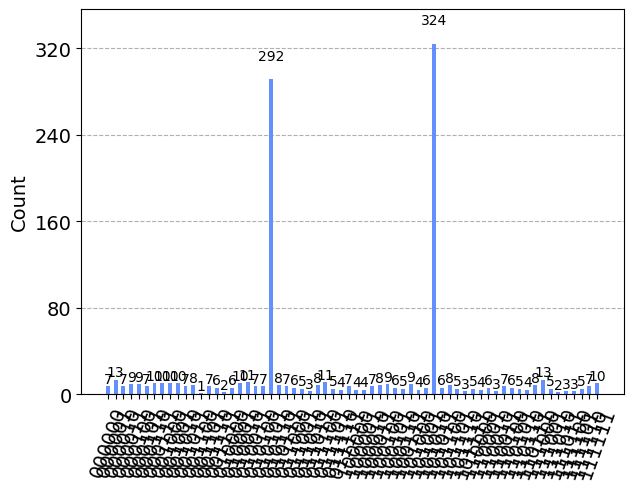

In [45]:
counts = result.get_counts() 
plot_histogram(counts)